In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
c = pd.read_csv('processed.cleveland.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})
h = pd.read_csv('processed.hungarian.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})

s = pd.read_csv('processed.switzerland.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})

v = pd.read_csv('processed.va.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})

In [42]:
#Concatenate all datafeames
frames = [c, h, s, v]
heart_disease = pd.concat(frames)

In [43]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [44]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB


In [45]:
heart_disease.describe()

,age,sex,cp,num
count,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,0.995652
std,9.424685,0.408148,0.930969,1.142693
min,28.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,1.000000
75%,60.000000,1.000000,4.000000,2.000000
max,77.000000,1.000000,4.000000,4.000000


In [46]:
heart_disease.dtypes

age         float64
sex         float64
cp          float64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
num           int64
dtype: object

In [47]:
#change type of columns to float
heart_disease = heart_disease.apply(pd.to_numeric, errors='coerce')

In [48]:
# fill NA with mean of each columns
heart_disease = heart_disease.fillna(heart_disease.mean())

In [50]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<AxesSubplot:>

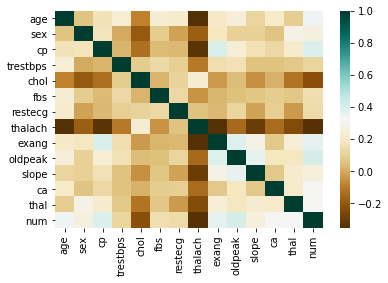

In [51]:
sns.heatmap(heart_disease.corr(),cmap="BrBG",annot=False)

In [52]:
from sklearn.model_selection import train_test_split
X = heart_disease.iloc[:, :-1]
y = heart_disease['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)

In [96]:
dt.fit(X_train, y_train)
result = dt.predict(X_test)

In [97]:
dt.score(X_test, y_test)

0.5036231884057971

In [56]:
from sklearn.metrics import f1_score
f1_score(y_test, result, average='micro')

0.5072463768115942

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
clf = GaussianNB()
clf.fit(X_train, y_train)
result = clf.predict(X_test)

In [60]:
f1_score(y_test, result, average='micro')

0.605072463768116

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=100)

In [90]:
clf.fit(X_train, y_train)
result = clf.predict(X_test)

In [91]:
f1_score(y_test, result, average='micro')

0.6014492753623188